In [ ]:
# !git clone -b indhu https://github.com/xusophia/DataSciFinalProj.git
!apt-get install swig3.0
!ln -s /usr/bin/swig3.0 /usr/bin/swig
!pip install gym[box2d]
!pip install pyvirtualdisplay --quiet

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig3.0
0 upgraded, 1 newly installed, 0 to remove and 1 not upgraded.
Need to get 1,109 kB of archives.
After this operation, 5,555 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig3.0 amd64 3.0.12-2.2ubuntu1 [1,109 kB]
Fetched 1,109 kB in 0s (2,809 kB/s)
Selecting previously unselected package swig3.0.
(Reading database ... 117758 files and directories currently installed.)
Preparing to unpack .../swig3.0_3.0.12-2.2ubuntu1_amd64.deb ...
Unpacking swig3.0 (3.0.12-2.2ubuntu1) ...
Setting up swig3.0 (3.0.12-2.2ubuntu1) ...
Processing triggers for man-db (2.10.2-1) ...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3

In [ ]:
!apt-get update > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!apt-get install -y swig build-essential python-dev python3-dev > /dev/null 2>&1
!apt-get install x11-utils > /dev/null 2>&1
!apt-get install xvfb > /dev/null 2>&1

In [ ]:
!apt-get install swig3.0
!ln -s /usr/bin/swig3.0 /usr/bin/swig
!pip install gym[box2d]

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
swig3.0 is already the newest version (3.0.12-2.2ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.
ln: failed to create symbolic link '/usr/bin/swig': File exists


In [ ]:
# @title Install dependencies
!pip install rarfile --quiet
!pip install stable-baselines3[extra] --quiet
!pip install ale-py --quiet
!pip install gym[box2d] --quiet
!pip install pyvirtualdisplay --quiet
!pip install pyglet --quiet
!pip install pygame --quiet
!pip install minigrid --quiet
!pip install -q swig --quiet
!pip install -q gymnasium[box2d] --quiet
!pip install 'minigrid<=2.1.1' --quiet
!pip3 install box2d-py --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 29.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 884.3/884.3 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.8/103.8 kB 849.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 1.4 MB/s eta 0:00:00


In [ ]:
# @title Imports
import io
import os
import glob
import torch
import base64

import numpy as np
import matplotlib.pyplot as plt

import sys
import gymnasium
sys.modules["gym"] = gymnasium

# import stable_baselines3
# from stable_baselines3 import DQN
# # from stable_baselines3 import
# from stable_baselines3.common.results_plotter import ts2xy, load_results
# from stable_baselines3.common.callbacks import EvalCallback
# from stable_baselines3.common.env_util import make_atari_env

import gymnasium as gym
from gym import spaces
from gym.envs.box2d.lunar_lander import *
from gym.wrappers.monitoring.video_recorder import VideoRecorder
from google.colab import files

In [ ]:
import torch.nn as nn
import torch
import torch.nn.functional as F
from torch.nn import Sequential
from collections import deque
import numpy as np
from gym.wrappers.monitoring.video_recorder import VideoRecorder

'''
Param defs:
env: gym env
lr:  learning rate for gradient descent
gamma: discount rate for future rewards in bellman function
epsilon: exploration rate
epsilon_decay: decay rate for exploration rate after each episode
buffer_size: for experience replay...storing past information on states, actions, rewards, next_states, done
'''

class DoubleDQN(nn.Module):
    def __init__(self, env, lr=1e-4, gamma=0.99, epsilon=1.0, epsilon_decay=0.995, buffer_size=500000):
        super(DoubleDQN, self).__init__()
        # input output dimensions
        self.state_space_dim = env.observation_space.shape[0]
        self.action_space_dim = env.action_space.n

        # our state-action function estimator

        self.local_net = Sequential(
            nn.Linear(self.state_space_dim, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, self.action_space_dim)
        )

        self.target_net = Sequential(
            nn.Linear(self.state_space_dim, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, self.action_space_dim)
        )
        self.lr = lr
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.env = env
        self.buffer = deque(maxlen=buffer_size)

        # updates the weights of the model after computing gradients
        self.optimizer = torch.optim.Adam(self.local_net.parameters(), lr=self.lr)

        self.copy = 3 # Copy the local model weights into the target network every 2 steps
        self.step = 0

        self.loss_fn = nn.MSELoss()  # defining our loss function to be the MSE loss

    def copy_model(self):
        # Copy local net weights into target net
        self.target_net.load_state_dict(self.local_net.state_dict())
        self.target_net.eval()

    def insert(self, state, action, reward, next_state, done):
        self.buffer.append((state, action, reward, next_state, done))

    # Get a mini-batch to train the model
    def sample_buffer(self, num_samples):
        states, actions, rewards, next_states, dones = [], [], [], [], []
        idx = np.random.choice(len(self.buffer), num_samples)
        for i in idx:
            elem = self.buffer[i]
            state, action, reward, next_state, done = elem
            states.append(np.array(state, copy=False))
            actions.append(np.array(action, copy=False))
            rewards.append(reward)
            next_states.append(np.array(next_state, copy=False))
            dones.append(done)
        states = torch.as_tensor(np.array(states))
        actions = torch.as_tensor(np.array(actions, dtype=np.int64))
        rewards = torch.as_tensor(np.array(rewards, dtype=np.float32))
        next_states = torch.as_tensor(np.array(next_states))
        dones = torch.as_tensor(np.array(dones, dtype=np.float32))
        return states, actions, rewards, next_states, dones

    def get_action(self, state):
        self.step += 1
        if np.random.uniform() < self.epsilon:
            return self.env.action_space.sample()
        else:
            return np.argmax(self.local_net(state).data.numpy())

    def train_batch(self, states, actions, rewards, next_states, dones):
        if self.step % self.copy == 0:
            self.copy_model()
        # Bellman equation for updates
        targets = rewards + self.gamma * self.target_net(next_states).max(-1).values * (1.0 - dones)
        preds = self.local_net(states)
        action_masks = F.one_hot(actions, self.action_space_dim)
        preds = (preds * action_masks).sum(dim=-1)
        loss = self.loss_fn(preds, targets.detach())
        self.optimizer.zero_grad()  # zero out the gradients for weights of model
        loss.backward()  # compute the gradient of loss with respect to model parameters
        self.optimizer.step()
        return loss

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# new new new
import torch.nn as nn
import torch
import torch.nn.functional as F
from torch.nn import Sequential
from collections import deque
import numpy as np

'''
Param defs:
env: gym env
lr:  learning rate for gradient descent
gamma: discount rate for future rewards in bellman function
epsilon: exploration rate
epsilon_decay: decay rate for exploration rate after each episode
buffer_size: for experience replay...storing past information on states, actions, rewards, next_states, done
'''

class DoubleDQN(nn.Module):
    def __init__(self, env, lr=1e-4, gamma=0.99, epsilon=1.0, epsilon_decay=0.995, buffer_size=500000):
        super(DoubleDQN, self).__init__()
        # input output dimensions
        self.state_space_dim = env.observation_space.shape[0]
        self.action_space_dim = env.action_space.n

        # our state-action function estimator

        self.local_net = Sequential(
            nn.Linear(self.state_space_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, self.action_space_dim)
        )

        self.target_net = Sequential(
            nn.Linear(self.state_space_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, self.action_space_dim)
        )
        self.lr = lr
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.env = env
        self.buffer = deque(maxlen=buffer_size)

        # updates the weights of the model after computing gradients
        self.optimizer = torch.optim.Adam(self.local_net.parameters(), lr=self.lr)

        self.copy = 5 # Copy the local model weights into the target network every 2 steps
        self.step = 0

        self.loss_fn = nn.MSELoss()  # defining our loss function to be the MSE loss

    def copy_model(self):
        # Copy local net weights into target net
        self.target_net.load_state_dict(self.local_net.state_dict())
        self.target_net.eval()

    def insert(self, state, action, reward, next_state, done):
        self.buffer.append((state, action, reward, next_state, done))

    # Get a mini-batch to train the model
    def sample_buffer(self, num_samples):
        states, actions, rewards, next_states, dones = [], [], [], [], []
        idx = np.random.choice(len(self.buffer), num_samples)
        for i in idx:
            elem = self.buffer[i]
            state, action, reward, next_state, done = elem
            states.append(np.array(state, copy=False))
            actions.append(np.array(action, copy=False))
            rewards.append(reward)
            next_states.append(np.array(next_state, copy=False))
            dones.append(done)
        states = torch.as_tensor(np.array(states))
        actions = torch.as_tensor(np.array(actions, dtype=np.int64))
        rewards = torch.as_tensor(np.array(rewards, dtype=np.float32))
        next_states = torch.as_tensor(np.array(next_states))
        dones = torch.as_tensor(np.array(dones, dtype=np.float32))
        return states, actions, rewards, next_states, dones

    def get_action(self, state):
        self.step += 1
        if np.random.uniform() < self.epsilon:
            return self.env.action_space.sample()
        else:
            return np.argmax(self.local_net(state).data.numpy())

    def train_batch(self, states, actions, rewards, next_states, dones):
        if self.step % self.copy == 0:
            self.copy_model()
        # Bellman equation for updates
        targets = rewards + self.gamma * self.target_net(next_states).max(-1).values * (1.0 - dones)
        preds = self.local_net(states)
        action_masks = F.one_hot(actions, self.action_space_dim)
        preds = (preds * action_masks).sum(dim=-1)
        loss = self.loss_fn(preds, targets.detach())
        self.optimizer.zero_grad()  # zero out the gradients for weights of model
        loss.backward()  # compute the gradient of loss with respect to model parameters
        self.optimizer.step()
        return loss

In [ ]:
!mkdir results/
!mkdir saved/

Episode 50/2000. Epsilon: 0.774. Reward in the last 100 episodes: -115.42
Episode 100/2000. Epsilon: 0.603. Reward in the last 100 episodes: -111.94
Episode 150/2000. Epsilon: 0.469. Reward in the last 100 episodes: -100.11
Episode 200/2000. Epsilon: 0.365. Reward in the last 100 episodes: -137.83
Episode 250/2000. Epsilon: 0.284. Reward in the last 100 episodes: -167.69
Episode 300/2000. Epsilon: 0.221. Reward in the last 100 episodes: -200.17
Episode 350/2000. Epsilon: 0.172. Reward in the last 100 episodes: -202.89
Episode 400/2000. Epsilon: 0.134. Reward in the last 100 episodes: -92.37
Episode 450/2000. Epsilon: 0.104. Reward in the last 100 episodes: -27.53
Episode 500/2000. Epsilon: 0.081. Reward in the last 100 episodes: 53.82
Episode 550/2000. Epsilon: 0.063. Reward in the last 100 episodes: 144.95
Episode 600/2000. Epsilon: 0.049. Reward in the last 100 episodes: 166.35
Episode 650/2000. Epsilon: 0.038. Reward in the last 100 episodes: 186.82
Episode 700/2000. Epsilon: 0.030.

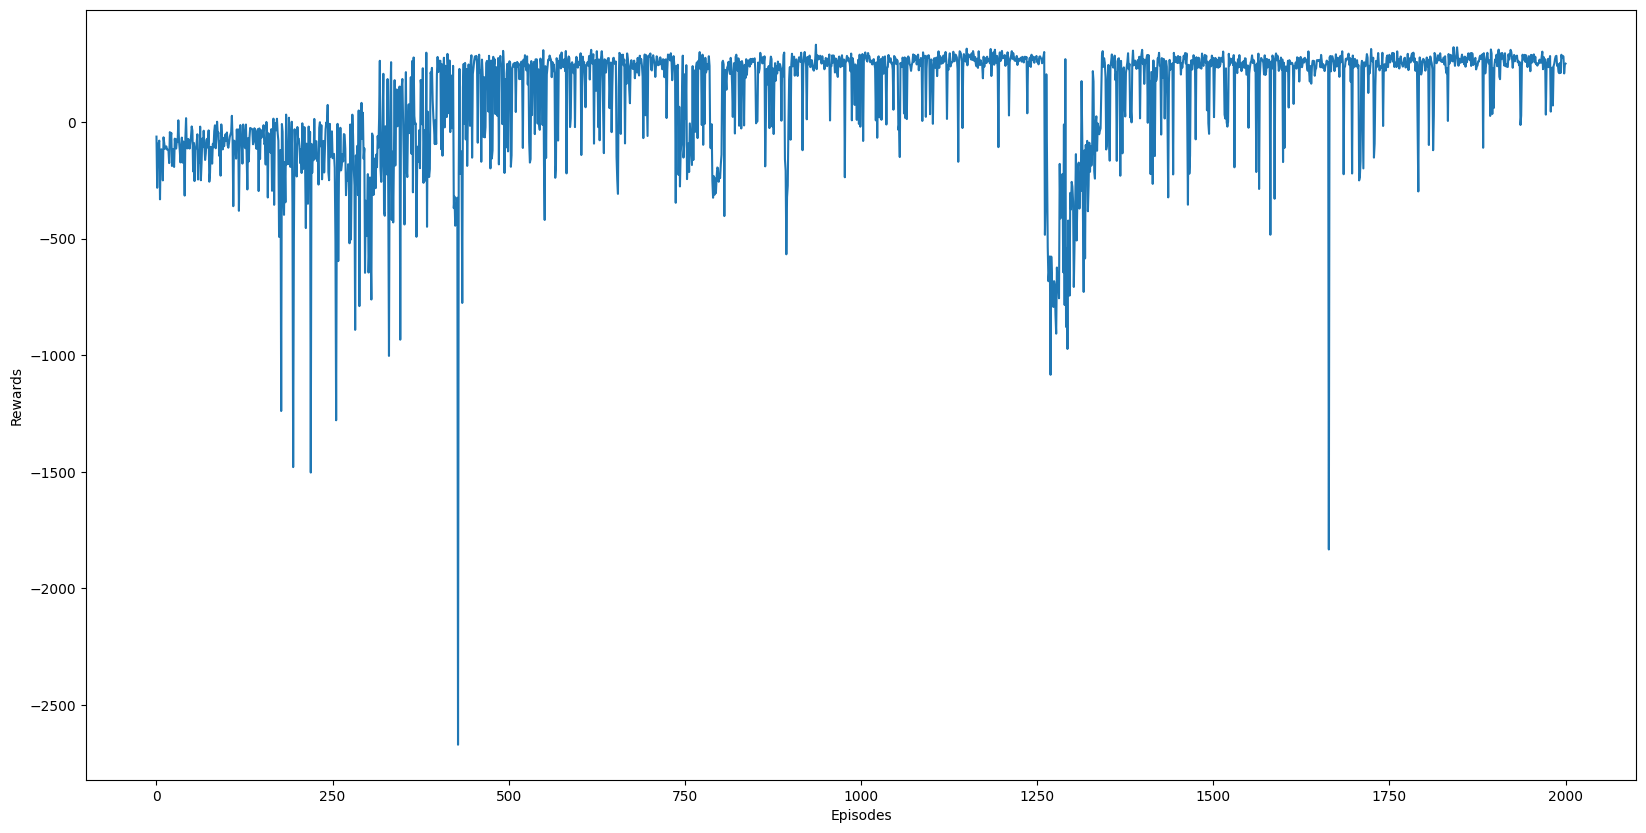

In [ ]:
import gym
# from VanillaDqn import DQN
# from DoubleDqn import DoubleDQN
import numpy as np
import torch

from gym.wrappers.monitoring.video_recorder import VideoRecorder
import matplotlib.pyplot as plt

env = gym.make('LunarLander-v2')
# recorder = VideoRecorder(env, path='results/vanilladqn.mp4')
episodes = 2000
epsilon = 1.0
gamma = 0.99
buffer_size = 500000
counter = 0
update_t = 20
batch_size = 128
lr = 1e-3
network = DoubleDQN(env, lr=lr, gamma=gamma, epsilon=epsilon, buffer_size=buffer_size)
reward_list_ep = []
reward_last_100_eps = []

for episode in range(episodes + 1):
    state= env.reset()[0].astype(np.float32)
    # print(state)
    reward_ep, done = 0, False

    while not done:
        # env.render()  # Comment this if you do not want rendering
        # env.unwrapped.render() # Comment this if you do not want rendering
        # recorder.capture_frame()
        state_tensor = torch.from_numpy(np.array(state))
        action = network.get_action(state_tensor)
        # print(action)
        # print(env.step(action)/)
        next_state, reward, done, info,_ = env.step(action)
        next_state = next_state.astype(np.float32)
        reward_ep += reward
        network.insert(state, action, reward, next_state, done)
        state = next_state

        counter += 1
        counter %= update_t

        if len(network.buffer) > batch_size:  # update weights every 5 steps
            states, actions, rewards, next_states, dones = network.sample_buffer(batch_size)
            loss = network.train_batch(states, actions, rewards, next_states, dones)

    if episode < 900:
        network.epsilon *= network.epsilon_decay
    reward_list_ep.append(reward_ep)

    if len(reward_last_100_eps) == 100:
        reward_last_100_eps = reward_last_100_eps[1:]
    reward_last_100_eps.append(reward_ep)

    if episode % 50 == 0 and episode > 1:
        print(f'Episode {episode}/{episodes}. Epsilon: {network.epsilon:.3f}.'
              f' Reward in the last 100 episodes: {np.mean(reward_last_100_eps):.2f}')
    last_rewards_mean = np.mean(reward_last_100_eps)
    # if last_rewards_mean > 200:
    #     break
env.close()

# PATH1 = 'saved/lunarlanderDouble.pt'
# torch.save(network.state_dict(), PATH1)
fig = plt.figure(figsize=(20, 10))
#plt.scatter([i for i in range(len(reward_list_ep))], reward_list_ep)
plt.xlabel("Episodes")
plt.ylabel("Rewards")
plt.plot([i for i in range(len(reward_list_ep))], reward_list_ep)
plt.xlabel("Episodes")
plt.ylabel("Rewards")
plt.savefig('DoubleDQN')

# fig = plt.figure(figsize=(20, 10))
# plt.scatter([i for i in range(len(reward_list_ep))], reward_list_ep)
# plt.xlabel("Episodes")
# plt.ylabel("Rewards")
# plt.savefig('results/vanillaDQNscatter.png')
# plt.plot([i for i in range(len(reward_list_ep))], reward_list_ep)
# plt.xlabel("Episodes")
# plt.ylabel("Rewards")
# plt.savefig('results/vanillaDQNplot.png')

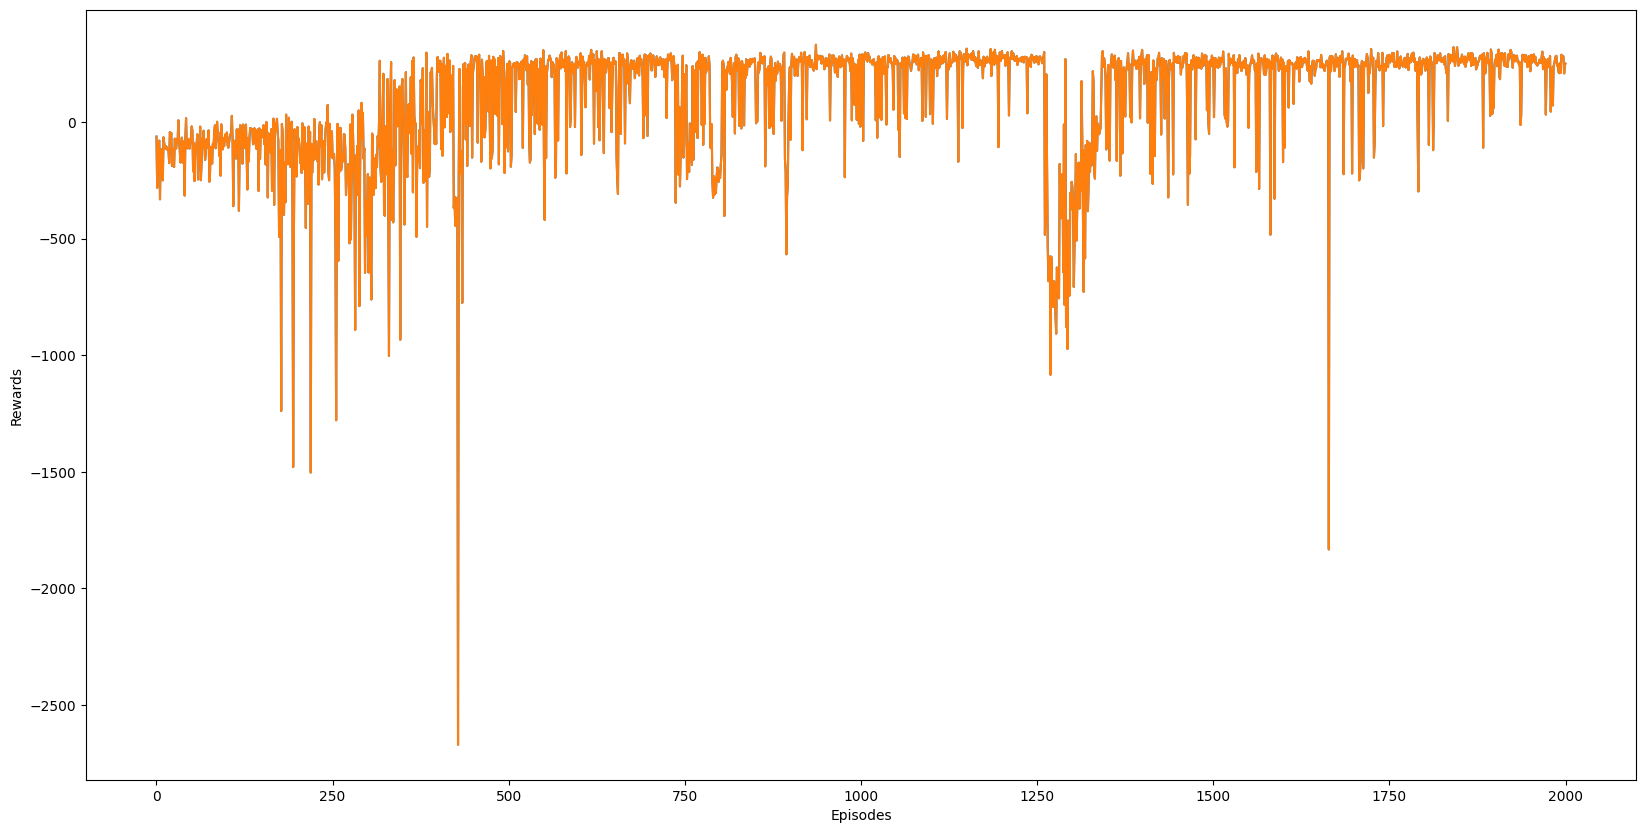

In [ ]:
PATH1 = 'saved/lunarlanderDouble.pt'
torch.save(network.state_dict(), PATH1)
fig = plt.figure(figsize=(20, 10))
plt.plot([i for i in range(len(reward_list_ep))], reward_list_ep)
plt.xlabel("Episodes")
plt.ylabel("Rewards")
plt.savefig('DoubleDQNscatter - Wind_divided_by_6.png')
plt.plot([i for i in range(len(reward_list_ep))], reward_list_ep, )
plt.xlabel("Episodes")
plt.ylabel("Rewards")
plt.savefig('DoubleDQNscatter - Wind_divided_by_6_plt')


In [ ]:


# files.download('/content/saved/lunarlanderDouble.pt')
# loading the trained actor
loaded_actor = torch.load("/content/saved/lunarlanderDouble.pt")


In [ ]:
# @title Play Video function
from IPython.display import HTML
from base64 import b64encode
from pyvirtualdisplay import Display
import os

# create the directory to store the video(s)
os.makedirs("./video", exist_ok=True)

display = Display(visible=False, size=(1400, 900))
_ = display.start()

"""
Utility functions to enable video recording of gym environment
and displaying it.
To enable video, just do "env = wrap_env(env)""
"""
def render_mp4(videopath: str) -> str:
  """
  Gets a string containing a b4-encoded version of the MP4 video
  at the specified path.
  """
  mp4 = open(videopath, 'rb').read()
  base64_encoded_mp4 = b64encode(mp4).decode()
  return f'<video width=400 controls><source src="data:video/mp4;' \
         f'base64,{base64_encoded_mp4}" type="video/mp4"></video>'



# #ٌRandom behaviour here
# env_name = 'LunarLander-v2'
# env = gym.make(env_name)

# env = gym.make(env_name, render_mode="rgb_array")
# vid = VideoRecorder(env, path=f"video/{env_name}_first_run.mp4")
# observation = env.reset()[0]

# total_reward = 0
# done = False
# while not done:
#   frame = env.render()
#   # print(frame)
#   vid.capture_frame()
#   action = np.random.randint(4)
#   observation, reward, done, info, _ = env.step(action)
#   total_reward += reward
# vid.close()
# env.close()
# print(f"\nTotal reward: {total_reward}")

# # show video
# html = render_mp4(f"video/{env_name}_first_run.mp4")
# HTML(html)

In [ ]:
import gym

#ٌRandom behaviour here
env_name = 'LunarLander-v2'
env = gym.make(env_name)

env = gym.make(env_name, render_mode="rgb_array")
vid = VideoRecorder(env, path=f"video/{env_name}_first_run.mp4")
observation = env.reset()[0]

total_reward = 0
done = False
while not done:
  frame = env.render()
  # print(frame)
  vid.capture_frame()
  action = np.random.randint(4)
  observation, reward, done, info, _ = env.step(action)
  total_reward += reward
vid.close()
env.close()
print(f"\nTotal reward: {total_reward}")

# show video
html = render_mp4(f"video/{env_name}_first_run.mp4")
HTML(html)

/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(



Total reward: -109.15494090849175


In [ ]:
env_name = 'LunarLander-v2'
env = gym.make(env_name, render_mode="rgb_array")
vid = VideoRecorder(env, path=f"video/{env_name}_learned.mp4")
observation = env.reset()[0]


total_reward = 0
done = False
while not done:
  frame = env.render()
  # print(frame)
  vid.capture_frame()
  state_tensor = torch.from_numpy(observation)
  action = network.get_action(state_tensor)
  observation, reward, done, info,_ = env.step(action)
  total_reward += reward
vid.close()
env.close()
print(f"\nTotal reward: {total_reward}")

# show video
html = render_mp4(f"video/{env_name}_learned.mp4")
HTML(html)

/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(



Total reward: 297.468273773988


## Modified ENV + Obstacle

In [ ]:

import math
import warnings
from typing import TYPE_CHECKING, Optional

import numpy as np

import gym
from gym import error, spaces
from gym.error import DependencyNotInstalled
from gym.utils import EzPickle, colorize
from gym.utils.step_api_compatibility import step_api_compatibility

try:
    import Box2D
    from Box2D.b2 import (
        circleShape,
        contactListener,
        edgeShape,
        fixtureDef,
        polygonShape,
        revoluteJointDef,
    )
except ImportError:
    raise DependencyNotInstalled("box2d is not installed, run `pip install gym[box2d]`")


if TYPE_CHECKING:
    import pygame


FPS = 50
SCALE = 30.0  # affects how fast-paced the game is, forces should be adjusted as well

MAIN_ENGINE_POWER = 13.0
SIDE_ENGINE_POWER = 0.6

INITIAL_RANDOM = 1000.0  # Set 1500 to make game harder

LANDER_POLY = [(-14, +17), (-17, 0), (-17, -10), (+17, -10), (+17, 0), (+14, +17)]
LEG_AWAY = 20
LEG_DOWN = 18
LEG_W, LEG_H = 2, 8
LEG_SPRING_TORQUE = 40

SIDE_ENGINE_HEIGHT = 14.0
SIDE_ENGINE_AWAY = 12.0

VIEWPORT_W = 600
VIEWPORT_H = 400





class ContactDetector(contactListener):
    def __init__(self, env):
        super().__init__()
        self.env = env

    # def BeginContact(self, contact):
    #     bodyA, bodyB = contact.fixtureA.body, contact.fixtureB.body

    #     # Safely check for 'obstacle' in userData for both bodies involved in the collision
    #     if self.is_obstacle(bodyA) or self.is_obstacle(bodyB):
    #         if self.env.lander in [bodyA, bodyB]:
    #             self.env.obstacle_hit = True
    #             print("Lander has hit the obstacle!")
    #         else:
    #             print("Obstacle was hit, but not by the lander.")

    #     # Check if the lander itself is involved in any collision
    #     if self.env.lander in [bodyA, bodyB]:
    #         self.env.game_over = True
    #         print("Game over: Lander crashed.")

    #     # Check for ground contact for each leg
    #     for i in range(2):
    #         if self.env.legs[i] == bodyA or self.env.legs[i] == bodyB:
    #             if self.env.moon == bodyA or self.env.moon == bodyB:
    #                 self.env.legs[i].ground_contact = True
    #                 print(f"Leg {i + 1} made contact with the ground.")
    def BeginContact(self, contact):
      bodyA, bodyB = contact.fixtureA.body, contact.fixtureB.body

      # Safely check for 'obstacle' in userData for both bodies involved in the collision
      if self.is_obstacle(bodyA) or self.is_obstacle(bodyB):
        if self.env.lander in [bodyA, bodyB]:
            self.env.obstacle_hit = True
            self.env.game_over = True  # Set game over if the lander hits an obstacle.
            # print("Game over: Lander has hit the obstacle!")
        # else:
            # print("Obstacle was hit, but not by the lander.")

      # Check if the lander itself is involved in any collision
      if self.env.lander in [bodyA, bodyB]:
          self.env.game_over = True
          print("Game over: Lander crashed.")

      # Check for ground or obstacle contact for each leg
      for i in range(2):
        if self.env.legs[i] in [bodyA, bodyB]:
            if self.env.moon in [bodyA, bodyB]:
                self.env.legs[i].ground_contact = True
                # print(f"Leg {i + 1} made contact with the ground.")
            if self.is_obstacle(bodyA) or self.is_obstacle(bodyB):
                self.env.game_over = True  # Set game over if a leg hits an obstacle.
                print(f"Game over: Leg {i + 1} hit an obstacle.")

    def EndContact(self, contact):
        bodyA, bodyB = contact.fixtureA.body, contact.fixtureB.body

        # Check for ground contact end for each leg
        for i in range(2):
            if self.env.legs[i] == bodyA or self.env.legs[i] == bodyB:
                if self.env.moon == bodyA or self.env.moon == bodyB:
                    self.env.legs[i]. ground_contact = False
                    print(f"Leg {i + 1} lost contact with the ground.")

    def is_obstacle(self, body):
        """ Helper method to determine if a body is an obstacle. """
        userData = getattr(body, 'userData', {})
        return isinstance(userData, dict) and 'obstacle' in userData


class LunarLanderwithObstacle(gym.Env, EzPickle):
    """
    ### Description
    This environment is a classic rocket trajectory optimization problem.
    According to Pontryagin's maximum principle, it is optimal to fire the
    engine at full throttle or turn it off. This is the reason why this
    environment has discrete actions: engine on or off.

    There are two environment versions: discrete or continuous.
    The landing pad is always at coordinates (0,0). The coordinates are the
    first two numbers in the state vector.
    Landing outside of the landing pad is possible. Fuel is infinite, so an agent
    can learn to fly and then land on its first attempt.

    To see a heuristic landing, run:
    ```
    python gym/envs/box2d/lunar_lander.py
    ```
    <!-- To play yourself, run: -->
    <!-- python examples/agents/keyboard_agent.py LunarLander-v2 -->

    ### Action Space
    There are four discrete actions available: do nothing, fire left
    orientation engine, fire main engine, fire right orientation engine.

    ### Observation Space
    The state is an 8-dimensional vector: the coordinates of the lander in `x` & `y`, its linear
    velocities in `x` & `y`, its angle, its angular velocity, and two booleans
    that represent whether each leg is in contact with the ground or not.

    ### Rewards
    After every step a reward is granted. The total reward of an episode is the
    sum of the rewards for all the steps within that episode.

    For each step, the reward:
    - is increased/decreased the closer/further the lander is to the landing pad.
    - is increased/decreased the slower/faster the lander is moving.
    - is decreased the more the lander is tilted (angle not horizontal).
    - is increased by 10 points for each leg that is in contact with the ground.
    - is decreased by 0.03 points each frame a side engine is firing.
    - is decreased by 0.3 points each frame the main engine is firing.

    The episode receive an additional reward of -100 or +100 points for crashing or landing safely respectively.

    An episode is considered a solution if it scores at least 200 points.

    ### Starting State
    The lander starts at the top center of the viewport with a random initial
    force applied to its center of mass.

    ### Episode Termination
    The episode finishes if:
    1) the lander crashes (the lander body gets in contact with the moon);
    2) the lander gets outside of the viewport (`x` coordinate is greater than 1);
    3) the lander is not awake. From the [Box2D docs](https://box2d.org/documentation/md__d_1__git_hub_box2d_docs_dynamics.html#autotoc_md61),
        a body which is not awake is a body which doesn't move and doesn't
        collide with any other body:
    > When Box2D determines that a body (or group of bodies) has come to rest,
    > the body enters a sleep state which has very little CPU overhead. If a
    > body is awake and collides with a sleeping body, then the sleeping body
    > wakes up. Bodies will also wake up if a joint or contact attached to
    > them is destroyed.

    ### Arguments
    To use to the _continuous_ environment, you need to specify the
    `continuous=True` argument like below:
    ```python
    import gym
    env = gym.make(
        "LunarLander-v2",
        continuous: bool = False,
        gravity: float = -10.0,
        enable_wind: bool = False,
        wind_power: float = 15.0,
        turbulence_power: float = 1.5,
    )
    ```
    If `continuous=True` is passed, continuous actions (corresponding to the throttle of the engines) will be used and the
    action space will be `Box(-1, +1, (2,), dtype=np.float32)`.
    The first coordinate of an action determines the throttle of the main engine, while the second
    coordinate specifies the throttle of the lateral boosters.
    Given an action `np.array([main, lateral])`, the main engine will be turned off completely if
    `main < 0` and the throttle scales affinely from 50% to 100% for `0 <= main <= 1` (in particular, the
    main engine doesn't work  with less than 50% power).
    Similarly, if `-0.5 < lateral < 0.5`, the lateral boosters will not fire at all. If `lateral < -0.5`, the left
    booster will fire, and if `lateral > 0.5`, the right booster will fire. Again, the throttle scales affinely
    from 50% to 100% between -1 and -0.5 (and 0.5 and 1, respectively).

    `gravity` dictates the gravitational constant, this is bounded to be within 0 and -12.

    If `enable_wind=True` is passed, there will be wind effects applied to the lander.
    The wind is generated using the function `tanh(sin(2 k (t+C)) + sin(pi k (t+C)))`.
    `k` is set to 0.01.
    `C` is sampled randomly between -9999 and 9999.

    `wind_power` dictates the maximum magnitude of linear wind applied to the craft. The recommended value for `wind_power` is between 0.0 and 20.0.
    `turbulence_power` dictates the maximum magnitude of rotational wind applied to the craft. The recommended value for `turbulence_power` is between 0.0 and 2.0.

    ### Version History
    - v2: Count energy spent and in v0.24, added turbulance with wind power and turbulence_power parameters
    - v1: Legs contact with ground added in state vector; contact with ground
        give +10 reward points, and -10 if then lose contact; reward
        renormalized to 200; harder initial random push.
    - v0: Initial version

    <!-- ### References -->

    ### Credits
    Created by Oleg Klimov
    """

    metadata = {
        "render_modes": ["human", "rgb_array"],
        "render_fps": FPS,
    }

    def __init__(
        self,
        render_mode: Optional[str] = None,
        continuous: bool = False,
        gravity: float = -10.0,
        enable_wind: bool = False,
        wind_power: float = 15.0,
        turbulence_power: float = 1.5,
    ):
        EzPickle.__init__(
            self,
            render_mode,
            continuous,
            gravity,
            enable_wind,
            wind_power,
            turbulence_power,
        )

        assert (
            -12.0 < gravity and gravity < 0.0
        ), f"gravity (current value: {gravity}) must be between -12 and 0"
        self.gravity = gravity

        if 0.0 > wind_power or wind_power > 20.0:
            warnings.warn(
                colorize(
                    f"WARN: wind_power value is recommended to be between 0.0 and 20.0, (current value: {wind_power})",
                    "yellow",
                ),
            )
        self.wind_power = wind_power

        if 0.0 > turbulence_power or turbulence_power > 2.0:
            warnings.warn(
                colorize(
                    f"WARN: turbulence_power value is recommended to be between 0.0 and 2.0, (current value: {turbulence_power})",
                    "yellow",
                ),
            )
        self.turbulence_power = turbulence_power
        # self.prev_altitude = None
        # self.hover_penalty = -0.1  # Define how severe the penalty for hovering should be
        # self.hover_threshold = 0.1  # Define how small an altitude change must be to be considered hovering
        # self.hover_counter = 0  # To count how many consecutive steps are considered hovering
        # self.max_hover_allowed = 10  # Max consecutive steps allowed to hover before penalty starts

        self.enable_wind = enable_wind
        self.wind_idx = np.random.randint(-9999, 9999)
        self.torque_idx = np.random.randint(-9999, 9999)

        self.screen: pygame.Surface = None
        self.clock = None
        self.isopen = True
        self.world = Box2D.b2World(gravity=(0, gravity))
        self.moon = None
        self.lander: Optional[Box2D.b2Body] = None
        self.particles = []

        self.prev_reward = None

        self.continuous = continuous

        ##
        self.obstacle_hit = False

        low = np.array(
            [
                # these are bounds for position
                # realistically the environment should have ended
                # long before we reach more than 50% outside
                -1.5,
                -1.5,
                # velocity bounds is 5x rated speed
                -5.0,
                -5.0,
                -math.pi,
                -5.0,
                -0.0,
                -0.0,
            ]
        ).astype(np.float32)
        high = np.array(
            [
                # these are bounds for position
                # realistically the environment should have ended
                # long before we reach more than 50% outside
                1.5,
                1.5,
                # velocity bounds is 5x rated speed
                5.0,
                5.0,
                math.pi,
                5.0,
                1.0,
                1.0,
            ]
        ).astype(np.float32)

        # useful range is -1 .. +1, but spikes can be higher
        self.observation_space = spaces.Box(low, high)

        if self.continuous:
            # Action is two floats [main engine, left-right engines].
            # Main engine: -1..0 off, 0..+1 throttle from 50% to 100% power. Engine can't work with less than 50% power.
            # Left-right:  -1.0..-0.5 fire left engine, +0.5..+1.0 fire right engine, -0.5..0.5 off
            self.action_space = spaces.Box(-1, +1, (2,), dtype=np.float32)
        else:
            # Nop, fire left engine, main engine, right engine
            self.action_space = spaces.Discrete(4)

        self.render_mode = render_mode

    def _destroy(self):
        if not self.moon:
            return
        self.world.contactListener = None
        self._clean_particles(True)
        self.world.DestroyBody(self.moon)
        self.moon = None
        self.world.DestroyBody(self.lander)
        self.lander = None
        self.world.DestroyBody(self.legs[0])
        self.world.DestroyBody(self.legs[1])

    def reset(
        self,
        *,
        seed: Optional[int] = None,
        options: Optional[dict] = None,
    ):
        super().reset(seed=seed)
        self._destroy()
        self.world.contactListener_keepref = ContactDetector(self)
        self.world.contactListener = self.world.contactListener_keepref
        self.game_over = False
        self.prev_shaping = None
        self.prev_altitude = None
        self.hover_counter = 0
        W = VIEWPORT_W / SCALE
        H = VIEWPORT_H / SCALE

        # terrain
        CHUNKS = 11
        height = self.np_random.uniform(0, H / 2, size=(CHUNKS + 1,))
        chunk_x = [W / (CHUNKS - 1) * i for i in range(CHUNKS)]
        self.helipad_x1 = chunk_x[CHUNKS // 2 - 1]
        self.helipad_x2 = chunk_x[CHUNKS // 2 + 1]
        self.helipad_y = H / 4
        height[CHUNKS // 2 - 2] = self.helipad_y
        height[CHUNKS // 2 - 1] = self.helipad_y
        height[CHUNKS // 2 + 0] = self.helipad_y
        height[CHUNKS // 2 + 1] = self.helipad_y
        height[CHUNKS // 2 + 2] = self.helipad_y
        smooth_y = [
            0.33 * (height[i - 1] + height[i + 0] + height[i + 1])
            for i in range(CHUNKS)
        ]

        self.moon = self.world.CreateStaticBody(
            shapes=edgeShape(vertices=[(0, 0), (W, 0)])
        )
        self.sky_polys = []
        for i in range(CHUNKS - 1):
            p1 = (chunk_x[i], smooth_y[i])
            p2 = (chunk_x[i + 1], smooth_y[i + 1])
            self.moon.CreateEdgeFixture(vertices=[p1, p2], density=0, friction=0.1)
            self.sky_polys.append([p1, p2, (p2[0], H), (p1[0], H)])

        self.moon.color1 = (0.0, 0.0, 0.0)
        self.moon.color2 = (0.0, 0.0, 0.0)

        initial_y = VIEWPORT_H / SCALE
        self.lander: Box2D.b2Body = self.world.CreateDynamicBody(
            position=(VIEWPORT_W / SCALE / 2, initial_y),
            angle=0.0,
            fixtures=fixtureDef(
                shape=polygonShape(
                    vertices=[(x / SCALE, y / SCALE) for x, y in LANDER_POLY]
                ),
                density=5.0,
                friction=0.1,
                categoryBits=0x0100,
                maskBits=0x001|0x0400,  #maskBits=0x001 | 0x0080,  # collide only with ground
                restitution=0.0,
            ),  # 0.99 bouncy
        )
        self.lander.color1 = (128, 102, 230)
        self.lander.color2 = (77, 77, 128)
        self.lander.ApplyForceToCenter(
            (
                self.np_random.uniform(-INITIAL_RANDOM, INITIAL_RANDOM),
                self.np_random.uniform(-INITIAL_RANDOM, INITIAL_RANDOM),
            ),
            True,
        )

        self.legs = []
        for i in [-1, +1]:
            leg = self.world.CreateDynamicBody(
                position=(VIEWPORT_W / SCALE / 2 - i * LEG_AWAY / SCALE, initial_y),
                angle=(i * 0.05),
                fixtures=fixtureDef(
                    shape=polygonShape(box=(LEG_W / SCALE, LEG_H / SCALE)),
                    density=1.0,
                    restitution=0.0,
                    categoryBits=0x0200,
                    maskBits=0x001|0x0400 ,
                ),
            )
            leg.ground_contact = False
            leg.color1 = (128, 102, 230)
            leg.color2 = (77, 77, 128)
            rjd = revoluteJointDef(
                bodyA=self.lander,
                bodyB=leg,
                localAnchorA=(0, 0),
                localAnchorB=(i * LEG_AWAY / SCALE, LEG_DOWN / SCALE),
                enableMotor=True,
                enableLimit=True,
                maxMotorTorque=LEG_SPRING_TORQUE,
                motorSpeed=+0.3 * i,  # low enough not to jump back into the sky
            )
            if i == -1:
                rjd.lowerAngle = (
                    +0.9 - 0.5
                )  # The most esoteric numbers here, angled legs have freedom to travel within
                rjd.upperAngle = +0.9
            else:
                rjd.lowerAngle = -0.9
                rjd.upperAngle = -0.9 + 0.5
            leg.joint = self.world.CreateJoint(rjd)
            self.legs.append(leg)

        # self.drawlist = [self.lander] + self.legs

        # Define obstacle
        # self.obstacle = self.world.CreateStaticBody(
        # position=(VIEWPORT_W / SCALE / 4, VIEWPORT_H / SCALE / 4),
        # shapes=polygonShape(box=(0.75, 0.75)),  # Dimensions of the obstacle
        # userData={'obstacle': True}
        # )
        # self.obstacle.color1 = (255, 0, 0)
        # self.obstacle.color2 = (180, 0, 0)

        W = VIEWPORT_W / SCALE
        H = VIEWPORT_H / SCALE

        # Create the obstacle positioned in the middle of the screen horizontally
        # and at a strategic vertical position
        middle_x = VIEWPORT_W / SCALE / 2  # Middle of the screen horizontally
        obstacle_y = VIEWPORT_H / SCALE / 2 + 2# A third up the screen vertically

        self.obstacle: Box2D.b2Body = self.world.CreateStaticBody(
        position=(middle_x, obstacle_y),
        shapes=polygonShape(box=(0.75, 0.2)),  # Dimensions of the obstacle
        userData={'obstacle': True}
        )
        self.obstacle.color1 = (255, 0, 0)  # Red color for visibility
        self.obstacle.color2 = (180, 0, 0)
        # self.obstacle.CreateFixture(
        # shape=polygonShape(box=(1, 0.2)),  # Same size as the body's shape
        #         density=0.0,
        #         friction=0.9,
        #         restitution=0.0,
        #         categoryBits=0x0001,
        #         maskBits=0x0010 | 0x0020 ,
        # )

        obstacle_fixture = fixtureDef(
        shape=polygonShape(box=(0.75, 0.2)),
        density=0,  # Static body does not need density
        friction=0.9,
        restitution=0.0,
        categoryBits=0x0400,
        maskBits=0x0100 | 0x0200  # Should interact with lander and legs
        )
        self.obstacle.CreateFixture(obstacle_fixture)


        self.drawlist = [self.lander] + self.legs+[self.obstacle]

        if self.render_mode == "human":
            self.render()
        return self.step(np.array([0, 0]) if self.continuous else 0)[0], {}

    def _create_particle(self, mass, x, y, ttl):
        p = self.world.CreateDynamicBody(
            position=(x, y),
            angle=0.0,
            fixtures=fixtureDef(
                shape=circleShape(radius=2 / SCALE, pos=(0, 0)),
                density=mass,
                friction=0.1,
                categoryBits=0x0300,
                maskBits=0x0010|0x0400,  # collide only with ground
                restitution=0.3,
            ),
        )
        p.ttl = ttl
        self.particles.append(p)
        self._clean_particles(False)
        return p

    def _clean_particles(self, all):
        while self.particles and (all or self.particles[0].ttl < 0):
            self.world.DestroyBody(self.particles.pop(0))

    def step(self, action):
        assert self.lander is not None

        # Update wind
        assert self.lander is not None, "You forgot to call reset()"
        if self.enable_wind and not (
            self.legs[0].ground_contact or self.legs[1].ground_contact
        ):
            # the function used for wind is tanh(sin(2 k x) + sin(pi k x)),
            # which is proven to never be periodic, k = 0.01
            wind_mag = (
                math.tanh(
                    math.sin(0.02 * self.wind_idx)
                    + (math.sin(math.pi * 0.01 * self.wind_idx))
                )
                * self.wind_power
            )
            self.wind_idx += 1
            self.lander.ApplyForceToCenter(
                (wind_mag, 0.0),
                True,
            )

            # the function used for torque is tanh(sin(2 k x) + sin(pi k x)),
            # which is proven to never be periodic, k = 0.01
            torque_mag = math.tanh(
                math.sin(0.02 * self.torque_idx)
                + (math.sin(math.pi * 0.01 * self.torque_idx))
            ) * (self.turbulence_power)
            self.torque_idx += 1
            self.lander.ApplyTorque(
                (torque_mag),
                True,
            )

        if self.continuous:
            action = np.clip(action, -1, +1).astype(np.float32)
        else:
            assert self.action_space.contains(
                action
            ), f"{action!r} ({type(action)}) invalid "

        # Engines
        tip = (math.sin(self.lander.angle), math.cos(self.lander.angle))
        side = (-tip[1], tip[0])
        dispersion = [self.np_random.uniform(-1.0, +1.0) / SCALE for _ in range(2)]

        m_power = 0.0
        if (self.continuous and action[0] > 0.0) or (
            not self.continuous and action == 2
        ):
            # Main engine
            if self.continuous:
                m_power = (np.clip(action[0], 0.0, 1.0) + 1.0) * 0.5  # 0.5..1.0
                assert m_power >= 0.5 and m_power <= 1.0
            else:
                m_power = 1.0
            # 4 is move a bit downwards, +-2 for randomness
            ox = tip[0] * (4 / SCALE + 2 * dispersion[0]) + side[0] * dispersion[1]
            oy = -tip[1] * (4 / SCALE + 2 * dispersion[0]) - side[1] * dispersion[1]
            impulse_pos = (self.lander.position[0] + ox, self.lander.position[1] + oy)
            p = self._create_particle(
                3.5,  # 3.5 is here to make particle speed adequate
                impulse_pos[0],
                impulse_pos[1],
                m_power,
            )  # particles are just a decoration
            p.ApplyLinearImpulse(
                (ox * MAIN_ENGINE_POWER * m_power, oy * MAIN_ENGINE_POWER * m_power),
                impulse_pos,
                True,
            )
            self.lander.ApplyLinearImpulse(
                (-ox * MAIN_ENGINE_POWER * m_power, -oy * MAIN_ENGINE_POWER * m_power),
                impulse_pos,
                True,
            )

        s_power = 0.0
        if (self.continuous and np.abs(action[1]) > 0.5) or (
            not self.continuous and action in [1, 3]
        ):
            # Orientation engines
            if self.continuous:
                direction = np.sign(action[1])
                s_power = np.clip(np.abs(action[1]), 0.5, 1.0)
                assert s_power >= 0.5 and s_power <= 1.0
            else:
                direction = action - 2
                s_power = 1.0
            ox = tip[0] * dispersion[0] + side[0] * (
                3 * dispersion[1] + direction * SIDE_ENGINE_AWAY / SCALE
            )
            oy = -tip[1] * dispersion[0] - side[1] * (
                3 * dispersion[1] + direction * SIDE_ENGINE_AWAY / SCALE
            )
            impulse_pos = (
                self.lander.position[0] + ox - tip[0] * 17 / SCALE,
                self.lander.position[1] + oy + tip[1] * SIDE_ENGINE_HEIGHT / SCALE,
            )
            p = self._create_particle(0.7, impulse_pos[0], impulse_pos[1], s_power)
            p.ApplyLinearImpulse(
                (ox * SIDE_ENGINE_POWER * s_power, oy * SIDE_ENGINE_POWER * s_power),
                impulse_pos,
                True,
            )
            self.lander.ApplyLinearImpulse(
                (-ox * SIDE_ENGINE_POWER * s_power, -oy * SIDE_ENGINE_POWER * s_power),
                impulse_pos,
                True,
            )

        self.world.Step(1.0 / FPS, 6 * 30, 2 * 30)

        pos = self.lander.position
        vel = self.lander.linearVelocity
        state = [
            (pos.x - VIEWPORT_W / SCALE / 2) / (VIEWPORT_W / SCALE / 2),
            (pos.y - (self.helipad_y + LEG_DOWN / SCALE)) / (VIEWPORT_H / SCALE / 2),
            vel.x * (VIEWPORT_W / SCALE / 2) / FPS,
            vel.y * (VIEWPORT_H / SCALE / 2) / FPS,
            self.lander.angle,
            20.0 * self.lander.angularVelocity / FPS,
            1.0 if self.legs[0].ground_contact else 0.0,
            1.0 if self.legs[1].ground_contact else 0.0,
        ]
        assert len(state) == 8

        reward = 0
        shaping = (
            -100 * np.sqrt(state[0] * state[0] + state[1] * state[1])
            - 100 * np.sqrt(state[2] * state[2] + state[3] * state[3])
            - 100 * abs(state[4])
            + 10 * state[6]
            + 10 * state[7]
        )  # And ten points for legs contact, the idea is if you
        # lose contact again after landing, you get negative reward
        if self.prev_shaping is not None:
            reward = shaping - self.prev_shaping
        self.prev_shaping = shaping

        reward -= (
            m_power * 0.30
        )  # less fuel spent is better, about -30 for heuristic landing
        reward -= s_power * 0.03

        terminated = False
        if self.game_over or abs(state[0]) >= 1.0:
            terminated = True
            reward = -100
        if not self.lander.awake:
            terminated = True
            reward = +200
            # Check for collision with the obstacle
        pos = self.lander.position
        vel = self.lander.linearVelocity
        # current_altitude = pos.y

        # # Check if previous altitude is initialized
        # if self.prev_altitude is not None:
        #     # Check if the lander is hovering
        #     if abs(self.prev_altitude - current_altitude) < self.hover_threshold:
        #         self.hover_counter += 1
        #     else:
        #         self.hover_counter = 0

        # # Apply hover penalty if hovering too long
        # if self.hover_counter > self.max_hover_allowed:
        #     reward += self.hover_penalty

        # self.prev_altitude = current_altitude  # Update the previous altitude
##################################################
        # # At the end of the step method, before returning the step result
        # center_distance = np.sqrt(state[0]**2 + state[1]**2)
        # reward -= 200 * center_distance  # Stronger penalty for being away from center
        # if center_distance < 0.1:  # Very close to center
        #     reward += 100  # Large bonus for precision landing
        # contact_bonus = 10 * (state[6] + state[7])
        # center_multiplier = max(0, 1 - 10 * center_distance)
        # reward += contact_bonus * center_multiplier  # Adjusted contact bonus
##################################################

        if self.obstacle_hit:
          reward -= 100  # Apply penalty for hitting the obstacle
          self.game_over = True  # Optionally end the game
          self.obstacle_hit = False  # Reset the flag
        # if reward<-200:
        #   reward+=-100
          terminated=True
          self.game_over = True
        # print("reward=", reward)
        if self.render_mode == "human":
            self.render()
        return np.array(state, dtype=np.float32), reward, terminated, False, {}

    def render(self):
        if self.render_mode is None:
            gym.logger.warn(
                "You are calling render method without specifying any render mode. "
                "You can specify the render_mode at initialization, "
                f'e.g. gym("{self.spec.id}", render_mode="rgb_array")'
            )
            return

        try:
            import pygame
            from pygame import gfxdraw
        except ImportError:
            raise DependencyNotInstalled(
                "pygame is not installed, run `pip install gym[box2d]`"
            )

        if self.screen is None and self.render_mode == "human":
            pygame.init()
            pygame.display.init()
            self.screen = pygame.display.set_mode((VIEWPORT_W, VIEWPORT_H))
        if self.clock is None:
            self.clock = pygame.time.Clock()

        self.surf = pygame.Surface((VIEWPORT_W, VIEWPORT_H))

        pygame.transform.scale(self.surf, (SCALE, SCALE))
        pygame.draw.rect(self.surf, (255, 255, 255), self.surf.get_rect())



      # Draw the terrain and other elements
      # Existing drawing code for terrain, lander, particles, etc.


        # self.surf = pygame.transform.flip(self.surf, False, True)

        for obj in self.particles:
            obj.ttl -= 0.15
            obj.color1 = (
                int(max(0.2, 0.15 + obj.ttl) * 255),
                int(max(0.2, 0.5 * obj.ttl) * 255),
                int(max(0.2, 0.5 * obj.ttl) * 255),
            )
            obj.color2 = (
                int(max(0.2, 0.15 + obj.ttl) * 255),
                int(max(0.2, 0.5 * obj.ttl) * 255),
                int(max(0.2, 0.5 * obj.ttl) * 255),
            )

        self._clean_particles(False)

        for p in self.sky_polys:
            scaled_poly = []
            for coord in p:
                scaled_poly.append((coord[0] * SCALE, coord[1] * SCALE))
            pygame.draw.polygon(self.surf, (0, 0, 0), scaled_poly)
            gfxdraw.aapolygon(self.surf, scaled_poly, (0, 0, 0))

        for obj in self.particles + self.drawlist:
            for f in obj.fixtures:
                trans = f.body.transform
                if type(f.shape) is circleShape:
                    pygame.draw.circle(
                        self.surf,
                        color=obj.color1,
                        center=trans * f.shape.pos * SCALE,
                        radius=f.shape.radius * SCALE,
                    )
                    pygame.draw.circle(
                        self.surf,
                        color=obj.color2,
                        center=trans * f.shape.pos * SCALE,
                        radius=f.shape.radius * SCALE,
                    )

                else:
                    path = [trans * v * SCALE for v in f.shape.vertices]
                    pygame.draw.polygon(self.surf, color=obj.color1, points=path)
                    gfxdraw.aapolygon(self.surf, path, obj.color1)
                    pygame.draw.aalines(
                        self.surf, color=obj.color2, points=path, closed=True
                    )

                for x in [self.helipad_x1, self.helipad_x2]:
                    x = x * SCALE
                    flagy1 = self.helipad_y * SCALE
                    flagy2 = flagy1 + 50
                    pygame.draw.line(
                        self.surf,
                        color=(255, 255, 255),
                        start_pos=(x, flagy1),
                        end_pos=(x, flagy2),
                        width=1,
                    )
                    pygame.draw.polygon(
                        self.surf,
                        color=(204, 204, 0),
                        points=[
                            (x, flagy2),
                            (x, flagy2 - 10),
                            (x + 25, flagy2 - 5),
                        ],
                    )
                    gfxdraw.aapolygon(
                        self.surf,
                        [(x, flagy2), (x, flagy2 - 10), (x + 25, flagy2 - 5)],
                        (204, 204, 0),
                    )
              # Draw the obstacle
        # if self.obstacle:
        #   # Assuming obstacle's position and size have been defined appropriately
        #   obs_pos = self.obstacle.position
        #   obs_poly = [(obs_pos.x + x, obs_pos.y + y) for x, y in [(-0.5, 0.2), (0.5, 0.2), (0.5, -0.2), (-0.5, -0.2)]]
        #   obs_poly_scaled = [(x * SCALE, VIEWPORT_H - y * SCALE) for x, y in obs_poly]  # Adjust for Pygame coordinates system
        #   pygame.draw.polygon(self.surf, (255, 0, 0), obs_poly_scaled)  # Draw the obstacle in red

        self.surf = pygame.transform.flip(self.surf, False, True)

        if self.render_mode == "human":
            assert self.screen is not None
            self.screen.blit(self.surf, (0, 0))
            pygame.event.pump()
            self.clock.tick(self.metadata["render_fps"])
            pygame.display.flip()
        elif self.render_mode == "rgb_array":
            return np.transpose(
                np.array(pygame.surfarray.pixels3d(self.surf)), axes=(1, 0, 2)
            )

    def close(self):
        if self.screen is not None:
            import pygame

            pygame.display.quit()
            pygame.quit()
            self.isopen = False


def heuristic(env, s):
    """
    The heuristic for
    1. Testing
    2. Demonstration rollout.

    Args:
        env: The environment
        s (list): The state. Attributes:
            s[0] is the horizontal coordinate
            s[1] is the vertical coordinate
            s[2] is the horizontal speed
            s[3] is the vertical speed
            s[4] is the angle
            s[5] is the angular speed
            s[6] 1 if first leg has contact, else 0
            s[7] 1 if second leg has contact, else 0

    Returns:
         a: The heuristic to be fed into the step function defined above to determine the next step and reward.
    """

    angle_targ = s[0] * 0.5 + s[2] * 1.0  # angle should point towards center
    if angle_targ > 0.4:
        angle_targ = 0.4  # more than 0.4 radians (22 degrees) is bad
    if angle_targ < -0.4:
        angle_targ = -0.4
    hover_targ = 0.55 * np.abs(
        s[0]
    )  # target y should be proportional to horizontal offset

    angle_todo = (angle_targ - s[4]) * 0.5 - (s[5]) * 1.0
    hover_todo = (hover_targ - s[1]) * 0.5 - (s[3]) * 0.5

    if s[6] or s[7]:  # legs have contact
        angle_todo = 0
        hover_todo = (
            -(s[3]) * 0.5
        )  # override to reduce fall speed, that's all we need after contact

    if env.continuous:
        a = np.array([hover_todo * 20 - 1, -angle_todo * 20])
        a = np.clip(a, -1, +1)
    else:
        a = 0
        if hover_todo > np.abs(angle_todo) and hover_todo > 0.05:
            a = 2
        elif angle_todo < -0.05:
            a = 3
        elif angle_todo > +0.05:
            a = 1
    return a


def demo_heuristic_lander(env, seed=None, render=False):

    total_reward = 0
    steps = 0
    s, info = env.reset(seed=seed)
    while True:
        a = heuristic(env, s)
        s, r, terminated, truncated, info = step_api_compatibility(env.step(a), True)
        total_reward += r

        if render:
            still_open = env.render()
            if still_open is False:
                break

        if steps % 20 == 0 or terminated or truncated:
            print("observations:", " ".join([f"{x:+0.2f}" for x in s]))
            print(f"step {steps} total_reward {total_reward:+0.2f}")
        steps += 1
        if terminated or truncated:
            break
    if render:
        env.close()
    return total_reward


class LunarLanderContinuous:
    def __init__(self):
        raise error.Error(
            "Error initializing LunarLanderContinuous Environment.\n"
            "Currently, we do not support initializing this mode of environment by calling the class directly.\n"
            "To use this environment, instead create it by specifying the continuous keyword in gym.make, i.e.\n"
            'gym.make("LunarLander-v2", continuous=True)'
        )




from gym.envs.registration import registry, register, make, spec

register(
    id='LunarLanderDefault-v3',
    entry_point='__main__:LunarLanderwithObstacle',
    max_episode_steps=1000,
    reward_threshold=200,
)



Exception ignored in: <function VideoRecorder.__del__ at 0x7cccbd958700>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py", line 269, in __del__
  File "/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py", line 228, in close
AttributeError: 'VideoRecorder' object has no attribute 'encoder'
/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:542: UserWarning: WARN: Overriding environment LunarLanderDefault-v3
  logger.warn(f"Overriding environment {spec.id}")


In [ ]:

# Create environment
env_name="CustomLunarLander-v3"

env=LunarLanderwithObstacle()
env.render_mode="rgb_array"




## Train with obstacle

Episode 50/1000. Epsilon: 0.774. Reward in the last 100 episodes: -159.82
Episode 100/1000. Epsilon: 0.603. Reward in the last 100 episodes: -143.35
Episode 150/1000. Epsilon: 0.469. Reward in the last 100 episodes: -113.83
Episode 200/1000. Epsilon: 0.365. Reward in the last 100 episodes: -104.29
Episode 250/1000. Epsilon: 0.284. Reward in the last 100 episodes: -157.90
Episode 300/1000. Epsilon: 0.221. Reward in the last 100 episodes: -61.56
Episode 350/1000. Epsilon: 0.172. Reward in the last 100 episodes: 107.09
Episode 400/1000. Epsilon: 0.134. Reward in the last 100 episodes: 151.95
Episode 450/1000. Epsilon: 0.104. Reward in the last 100 episodes: 168.82
Episode 500/1000. Epsilon: 0.081. Reward in the last 100 episodes: 198.55
Episode 550/1000. Epsilon: 0.063. Reward in the last 100 episodes: 215.27
Episode 600/1000. Epsilon: 0.049. Reward in the last 100 episodes: 202.08
Episode 650/1000. Epsilon: 0.038. Reward in the last 100 episodes: 205.47
Episode 700/1000. Epsilon: 0.030. 

NameError: name 'files' is not defined

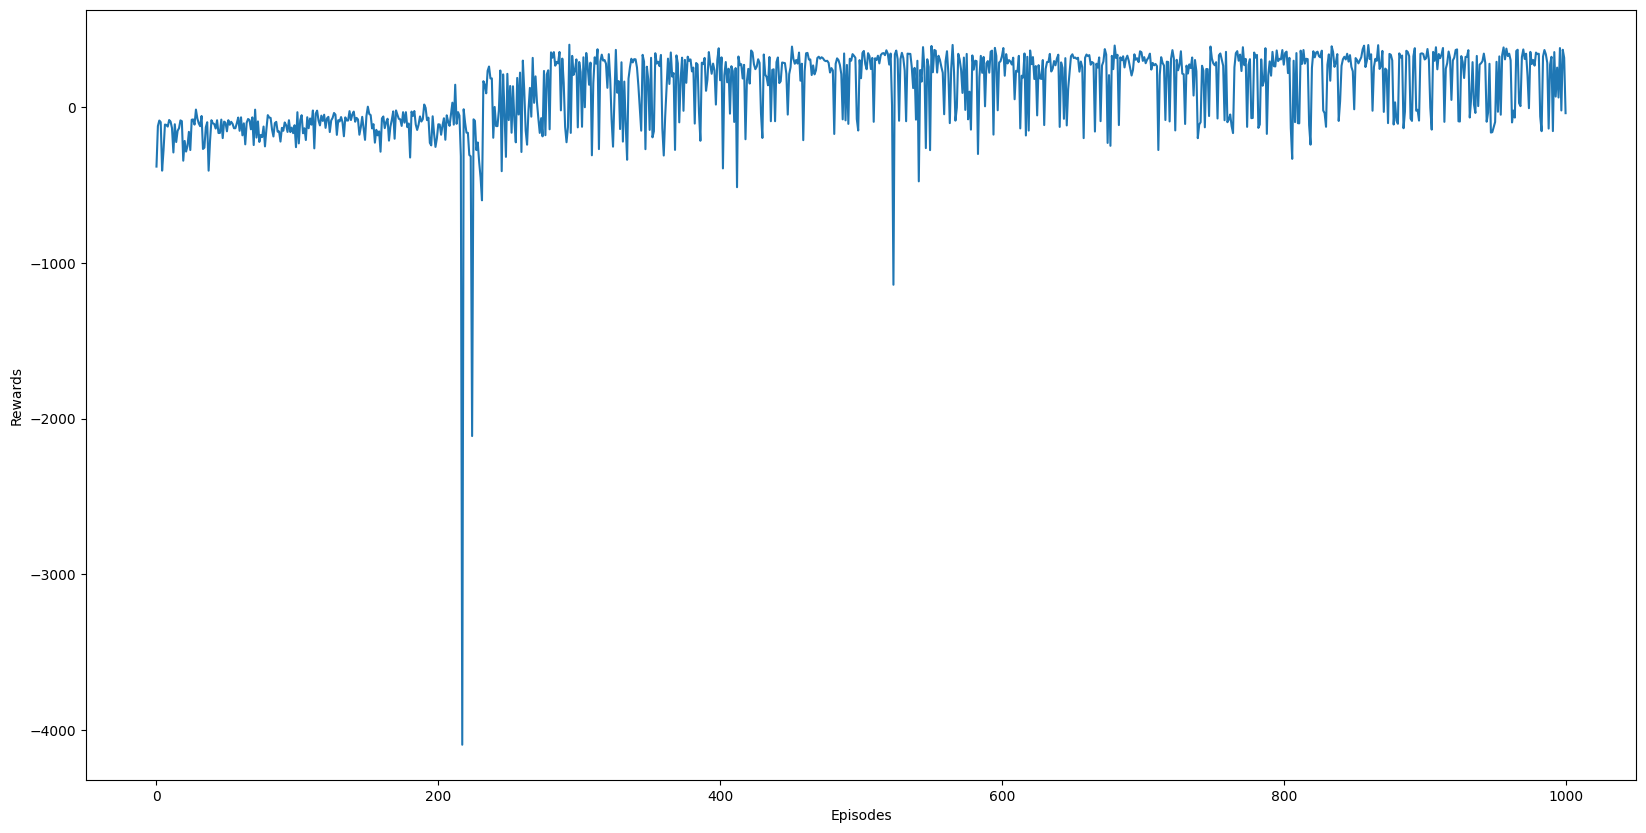

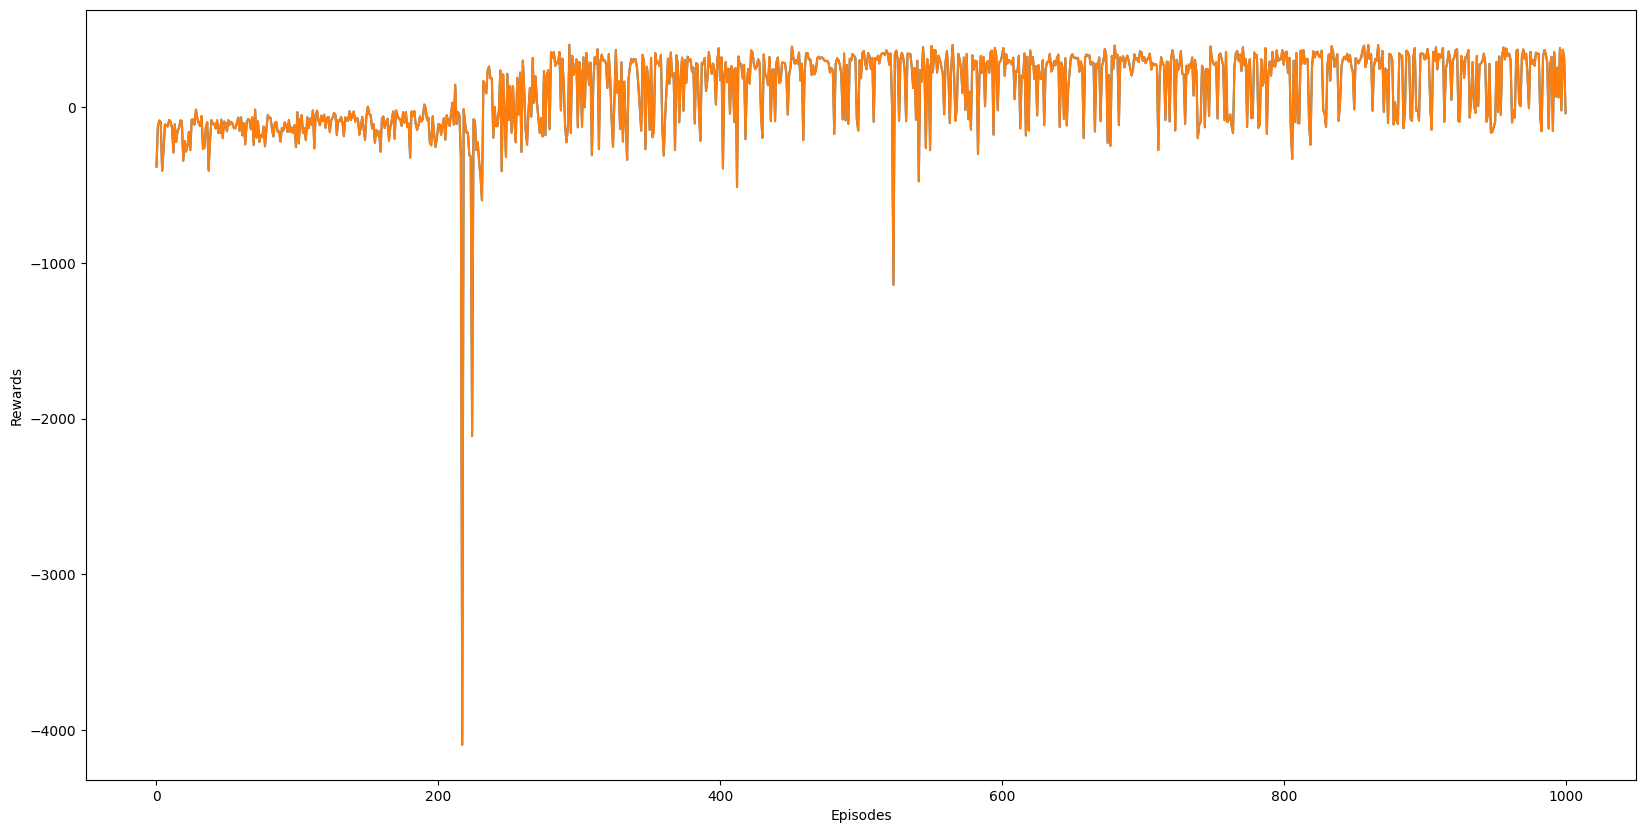

In [ ]:
import gym
# from VanillaDqn import DQN
# from DoubleDqn import DoubleDQN
import numpy as np
import torch

from gym.wrappers.monitoring.video_recorder import VideoRecorder
import matplotlib.pyplot as plt

# env = gym.make('LunarLander-v2')
# recorder = VideoRecorder(env, path='results/vanilladqn.mp4')
episodes = 1000
epsilon = 1.0
gamma = 0.99
buffer_size = 500000
counter = 0
update_t = 5
batch_size = 128
lr = 1e-3
network = DoubleDQN(env, lr=lr, gamma=gamma, epsilon=epsilon, buffer_size=buffer_size)
reward_list_ep = []
reward_last_100_eps = []

for episode in range(episodes + 1):
    state= env.reset()[0].astype(np.float32)
    # print(state)
    reward_ep, done = 0, False

    while not done:
        # env.render()  # Comment this if you do not want rendering
        # env.unwrapped.render() # Comment this if you do not want rendering
        # recorder.capture_frame()
        state_tensor = torch.from_numpy(np.array(state))
        action = network.get_action(state_tensor)
        # print(action)
        # print(env.step(action)/)
        next_state, reward, done, info,_ = env.step(action)
        next_state = next_state.astype(np.float32)
        reward_ep += reward
        network.insert(state, action, reward, next_state, done)
        state = next_state

        counter += 1
        counter %= update_t

        if len(network.buffer) > batch_size:  # update weights every 5 steps
            states, actions, rewards, next_states, dones = network.sample_buffer(batch_size)
            loss = network.train_batch(states, actions, rewards, next_states, dones)

    if episode < 900:
        network.epsilon *= network.epsilon_decay
    reward_list_ep.append(reward_ep)

    if len(reward_last_100_eps) == 100:
        reward_last_100_eps = reward_last_100_eps[1:]
    reward_last_100_eps.append(reward_ep)

    if episode % 50 == 0 and episode > 1:
        print(f'Episode {episode}/{episodes}. Epsilon: {network.epsilon:.3f}.'
              f' Reward in the last 100 episodes: {np.mean(reward_last_100_eps):.2f}')
    last_rewards_mean = np.mean(reward_last_100_eps)
    # if last_rewards_mean > 200:
    #     break
env.close()

# PATH1 = 'saved/lunarlanderDouble.pt'
# torch.save(network.state_dict(), PATH1)
fig = plt.figure(figsize=(20, 10))
#plt.scatter([i for i in range(len(reward_list_ep))], reward_list_ep)
plt.xlabel("Episodes")
plt.ylabel("Rewards")
plt.plot([i for i in range(len(reward_list_ep))], reward_list_ep)
plt.xlabel("Episodes")
plt.ylabel("Rewards")
plt.savefig('DoubleDQN')

# fig = plt.figure(figsize=(20, 10))
# plt.scatter([i for i in range(len(reward_list_ep))], reward_list_ep)
# plt.xlabel("Episodes")
# plt.ylabel("Rewards")
# plt.savefig('results/vanillaDQNscatter.png')
# plt.plot([i for i in range(len(reward_list_ep))], reward_list_ep)
# plt.xlabel("Episodes")
# plt.ylabel("Rewards")
# plt.savefig('results/vanillaDQNplot.png')

PATH1 = 'saved/lunarlanderDouble_obstacle.pt'
torch.save(network.state_dict(), PATH1)
fig = plt.figure(figsize=(20, 10))
plt.plot([i for i in range(len(reward_list_ep))], reward_list_ep)
plt.xlabel("Episodes")
plt.ylabel("Rewards")
plt.savefig('DoubleDQNscatter_obstacle.png')
plt.plot([i for i in range(len(reward_list_ep))], reward_list_ep, )
plt.xlabel("Episodes")
plt.ylabel("Rewards")
plt.savefig('DoubleDQNscatter_obs')


files.download('/content/saved/lunarlanderDouble_obstacle.pt')
files.download('/content/DoubleDQNscatter_obstacle.png')
# loading the trained actor
loaded_actor = torch.load("/content/saved/lunarlanderDouble.pt")


## Video replay

In [ ]:
from google.colab import files
env_name = 'LunarLanderDefault-v3'
env =LunarLanderwithObstacle()
env.render_mode="rgb_array"
vid = VideoRecorder(env, path=f"video/{env_name}_obstacle_learned.mp4")
observation = env.reset()[0]


total_reward = 0
done = False
while not done:
  frame = env.render()
  # print(frame)
  vid.capture_frame()
  state_tensor = torch.from_numpy(observation)
  action = network.get_action(state_tensor)
  observation, reward, done, info,_ = env.step(action)
  total_reward += reward
vid.close()
env.close()
print(f"\nTotal reward: {total_reward}")

# show video
html = render_mp4(f"video/{env_name}_obstacle_learned.mp4")
HTML(html)

/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(


Leg 1 lost contact with the ground.
Leg 1 lost contact with the ground.
Leg 2 lost contact with the ground.
Leg 2 lost contact with the ground.

Total reward: 209.42553746917605
